 # Comparison of GFlowNets with MCMC methods in 2D for the 4-simplex.

 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sys
import glob
from pathlib import Path
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import scipy

ROOT_DIR = os.path.abspath("__file__" + "/../../")
sys.path.insert(0, f"{ROOT_DIR}")

In [3]:
from src.MCMC import MCMC

## IMPORTANT

The reward function should return an array of dimensions given by the corresponding `dimensions` of length `grid_length`.

In [16]:
# Suggested reward_function. Feel free to use your own.

def reward_function(grid_length):
    reward = np.empty(shape=(grid_length, grid_length))
    for i in range(grid_length):
        for j in range(grid_length):    
            reward[i,j] = (i+j)+int(round(grid_length/2.0))/float(i*j+int(round(grid_length/2.0))) 
            
    return reward

In [17]:
iterations_number = 5*10**4
batch_size = iterations_number / 10
burn_factor = 100
deviation = 0.8
grid_length = 10
dimensions = 2

draws_folder_base = "data/2DComparison/iterations_"+str(iterations_number)+"_batch_size_"+str(batch_size)+"_burnin_"+str(burn_factor)+"_sigma_"+str(deviation)
verbosity = 0

draws_folder = str(draws_folder_base)+"/grid_length"+str(grid_length)+"/draws/"
os.makedirs(draws_folder, exist_ok=True)

MCMC.VertexMCMC(grid_length = grid_length, iterations_number = iterations_number, batch_size = batch_size, deviation = deviation, burn_factor = burn_factor, 
                   verbosity = verbosity, draws_folder = draws_folder, mean = 0., reward_function=reward_function, dimensions=dimensions )

## The distribution we want to simulate.

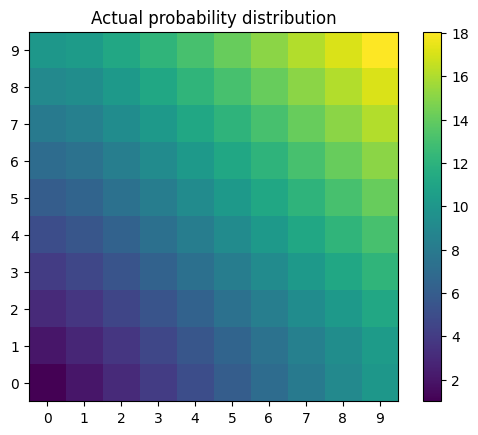

<Figure size 640x480 with 0 Axes>

In [18]:
axis = np.arange(grid_length)


plt.xticks(axis, labels=axis.astype(str))
plt.yticks(axis, labels=axis.astype(str))

# To plot the default distribution replace reward_function with MCMC.grid_rewards_2d.
plt.imshow(reward_function(grid_length = grid_length), cmap='viridis')
plt.colorbar()
plt.gca().set_title("Actual probability distribution")
plt.gca().invert_yaxis()
plt.show()
plt.clf()

## The generated distributions.

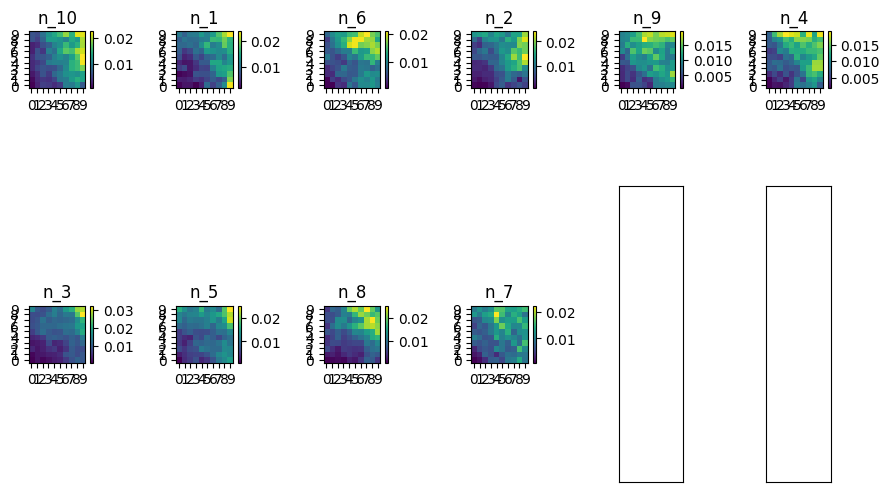

<Figure size 640x480 with 0 Axes>

In [19]:
dir = "data/2DComparison/iterations_"+str(iterations_number)+"_batch_size_"+str(batch_size)+"_burnin_"+str(burn_factor)+"_sigma_"+str(deviation)+"/grid_length"+str(grid_length)+"/draws/"

fileNumber = 0

for file in Path(dir).glob("**/*draw*"):
    fileNumber += 1

rows = 1

while(fileNumber % rows != 0):
    rows += 1

axis = np.arange(grid_length)

fig, axs = plt.subplots(nrows=math.ceil(fileNumber / 6.0), ncols=6, figsize=(9, 6), subplot_kw={'xticks': [], 'yticks': []})


for ax, file in zip(axs.flat, Path(dir).glob("**/*draw*")):
    df = np.genfromtxt(file, delimiter=',', skip_header=1)
    df = np.array(df)
    data = np.zeros(shape=(grid_length, grid_length))
    batchNumber = float(np.sum(df[:,2]))
    for i in range(df.shape[0]):
        data[int(df[i, 0]), int(df[i, 1])] += df[i, 2] / batchNumber
    
    title = str(os.path.basename(file).split("batch_",1)[1]) # Remove part beofre batch number
    title = title.split(".csv")[0] # Remove the ending
    ax.set_title(title)
    ax.set_xticks(axis, labels=axis.astype(str))
    ax.set_yticks(axis, labels=axis.astype(str))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(ax.imshow(data, cmap='viridis', interpolation='nearest'), cax = cax)
    ax.invert_yaxis()


plt.tight_layout()
plt.show()
plt.clf()



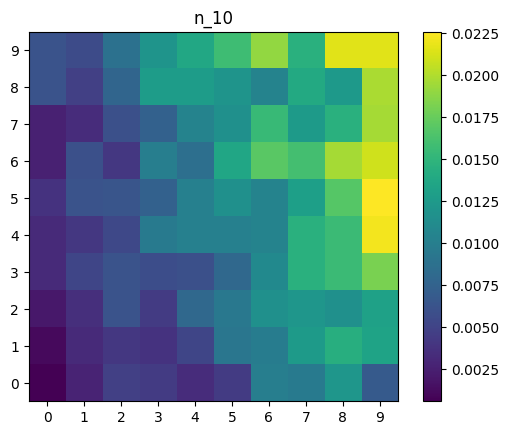

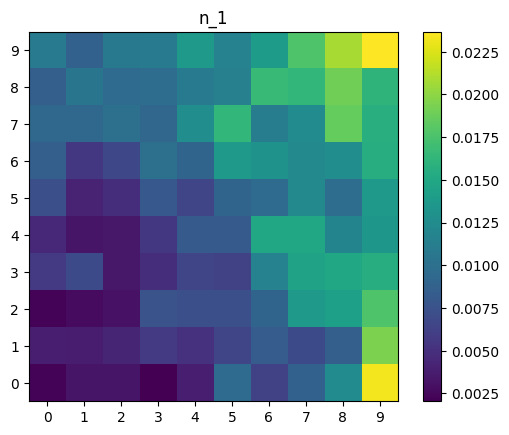

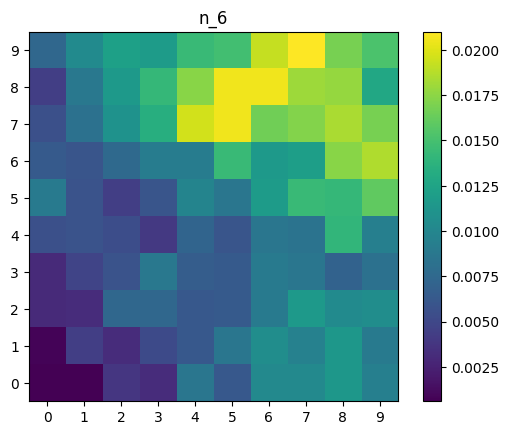

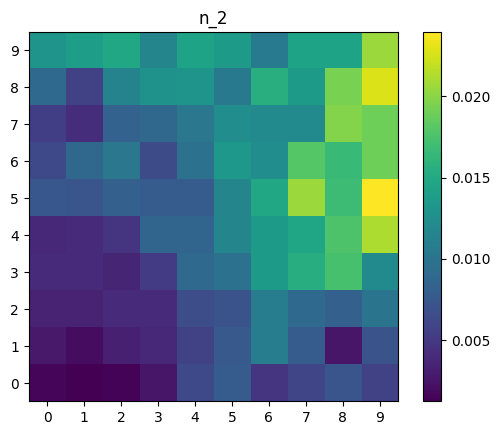

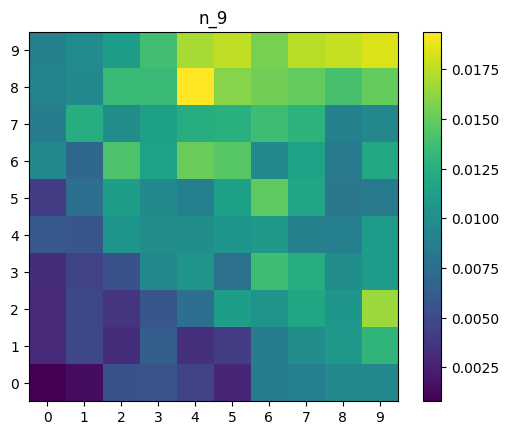

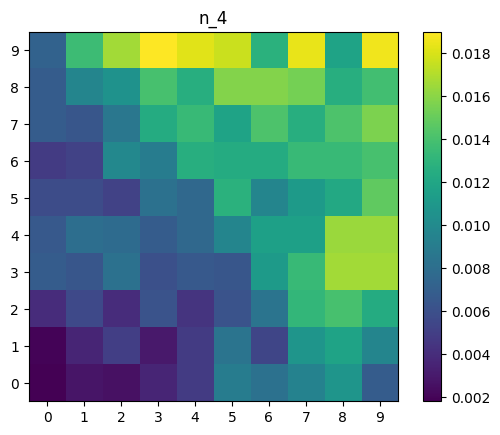

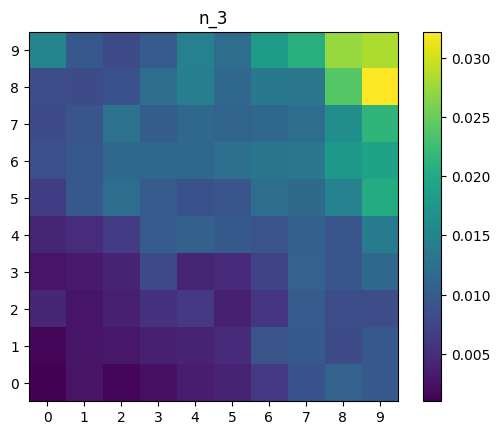

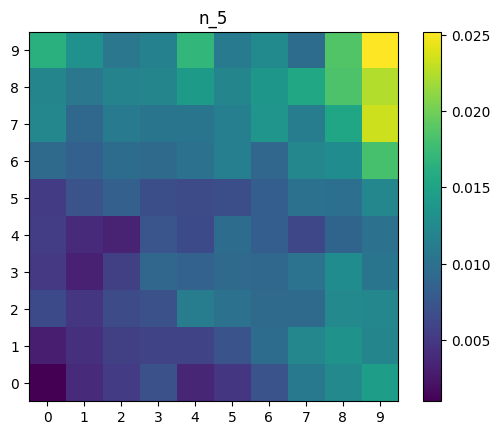

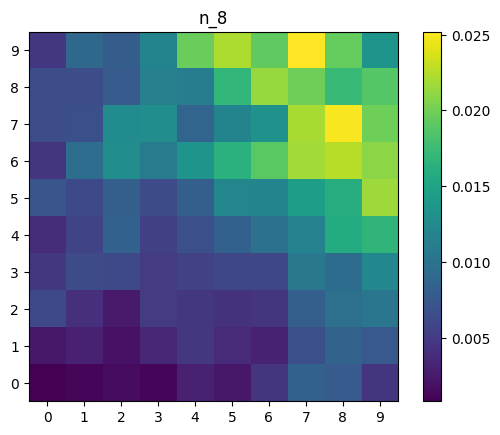

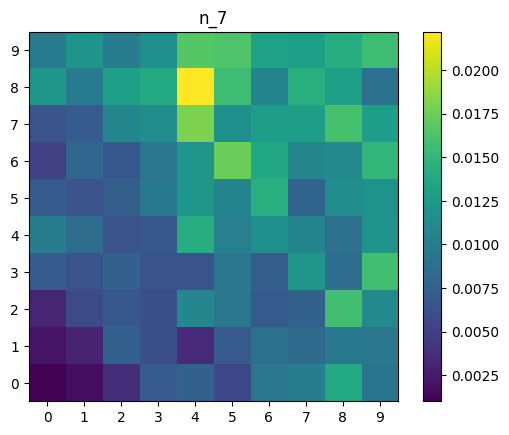

<Figure size 640x480 with 0 Axes>

In [20]:
dir = "data/2DComparison/iterations_"+str(iterations_number)+"_batch_size_"+str(batch_size)+"_burnin_"+str(burn_factor)+"_sigma_"+str(deviation)+"/grid_length"+str(grid_length)+"/draws/"

fileNumber = 0

for file in Path(dir).glob("**/*draw*"):
    fileNumber += 1



axis = np.arange(grid_length)

for file in Path(dir).glob("**/*draw*"):
    df = np.genfromtxt(file, delimiter=',', skip_header=1)
    df = np.array(df)
    data = np.zeros(shape=(grid_length, grid_length))
    batchNumber = float(np.sum(df[:,2]))

    for i in range(df.shape[0]):
        data[int(df[i, 0]), int(df[i, 1])] += df[i, 2]/batchNumber
    plt.xticks(axis, labels=axis.astype(str))
    plt.yticks(axis, labels=axis.astype(str))
    title = str(os.path.basename(file).split("batch_",1)[1]) # Remove part beofre batch number
    title = title.split(".csv")[0] # Remove the ending
    plt.imshow(data, cmap='viridis')
    plt.colorbar()
    plt.gca().set_title(str(title))
    plt.gca().invert_yaxis()
    plt.show()
    plt.clf()
    
    



## The default distribution

In [12]:
iterations_number = 5*10**4
batch_size = iterations_number / 10
burn_factor = 100
deviation = 0.8
grid_length = 10

draws_folder_base = "data/2DComparison/iterations_"+str(iterations_number)+"_batch_size_"+str(batch_size)+"_burnin_"+str(burn_factor)+"_sigma_"+str(deviation)
verbosity = 0

draws_folder = str(draws_folder_base)+"/grid_length"+str(grid_length)+"/draws/"
os.makedirs(draws_folder, exist_ok=True)

MCMC.VertexMCMC(grid_length = grid_length, iterations_number = iterations_number, batch_size = batch_size, deviation = deviation, burn_factor = burn_factor, 
                   verbosity = verbosity, draws_folder = draws_folder, mean = 0., dimensions=2 )

## The distribution we want to simulate.

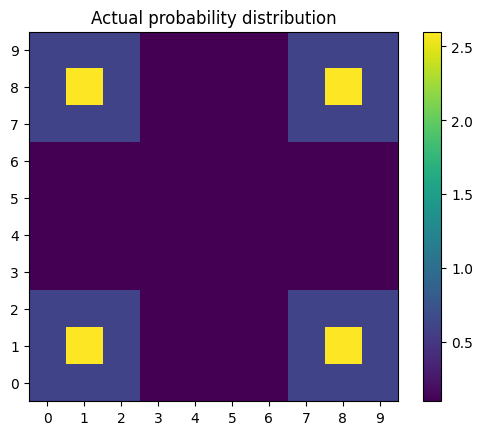

<Figure size 640x480 with 0 Axes>

In [13]:
axis = np.arange(grid_length)


plt.xticks(axis, labels=axis.astype(str))
plt.yticks(axis, labels=axis.astype(str))

# To plot the default distribution replace reward_function with MCMC.grid_rewards_2d.
plt.imshow(MCMC.grid_rewards_2d(grid_length = grid_length), cmap='viridis')
plt.colorbar()
plt.gca().set_title("Actual probability distribution")
plt.gca().invert_yaxis()
plt.show()
plt.clf()

## The generated distributions.

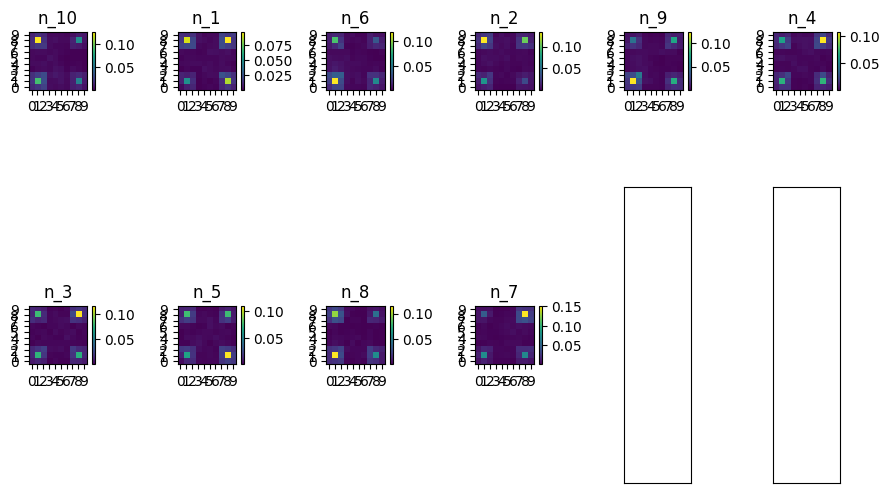

<Figure size 640x480 with 0 Axes>

In [14]:
dir = "data/2DComparison/iterations_"+str(iterations_number)+"_batch_size_"+str(batch_size)+"_burnin_"+str(burn_factor)+"_sigma_"+str(deviation)+"/grid_length"+str(grid_length)+"/draws/"

fileNumber = 0

for file in Path(dir).glob("**/*draw*"):
    fileNumber += 1

rows = 1

while(fileNumber % rows != 0):
    rows += 1

axis = np.arange(grid_length)

fig, axs = plt.subplots(nrows=math.ceil(fileNumber / 6.0), ncols=6, figsize=(9, 6), subplot_kw={'xticks': [], 'yticks': []})


for ax, file in zip(axs.flat, Path(dir).glob("**/*draw*")):
    df = np.genfromtxt(file, delimiter=',', skip_header=1)
    df = np.array(df)
    data = np.zeros(shape=(grid_length, grid_length))
    batchNumber = float(np.sum(df[:,2]))
    for i in range(df.shape[0]):
        data[int(df[i, 0]), int(df[i, 1])] += df[i, 2] / batchNumber
    
    title = str(os.path.basename(file).split("batch_",1)[1]) # Remove part beofre batch number
    title = title.split(".csv")[0] # Remove the ending
    ax.set_title(title)
    ax.set_xticks(axis, labels=axis.astype(str))
    ax.set_yticks(axis, labels=axis.astype(str))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(ax.imshow(data, cmap='viridis', interpolation='nearest'), cax = cax)
    ax.invert_yaxis()


plt.tight_layout()
plt.show()
plt.clf()



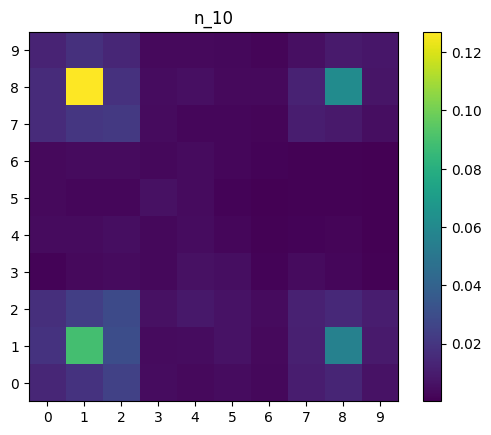

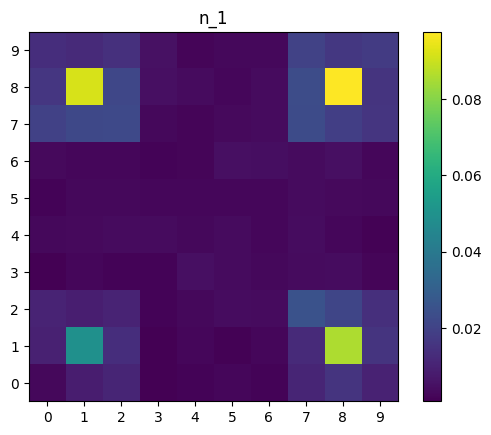

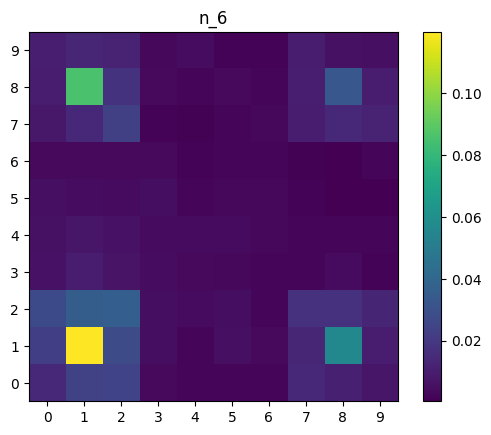

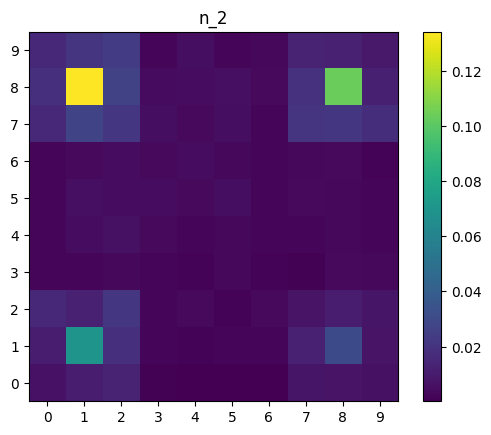

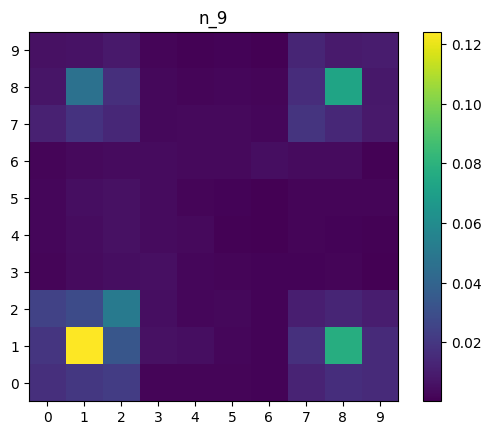

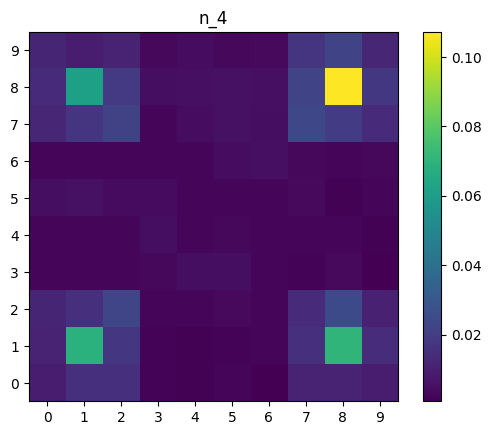

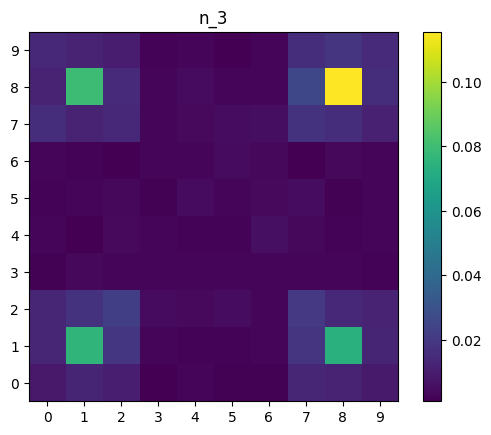

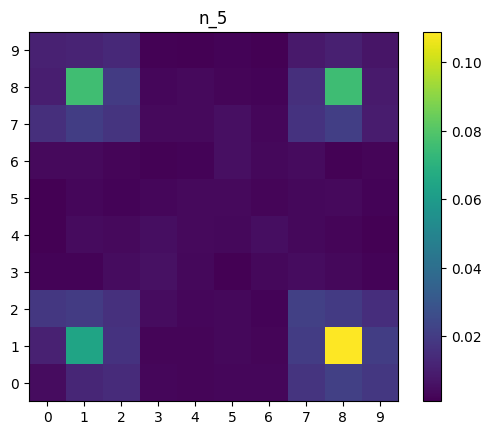

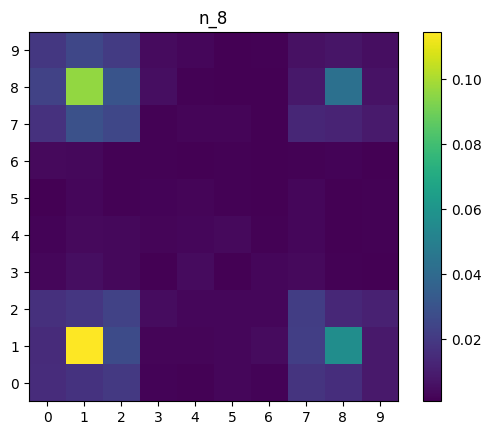

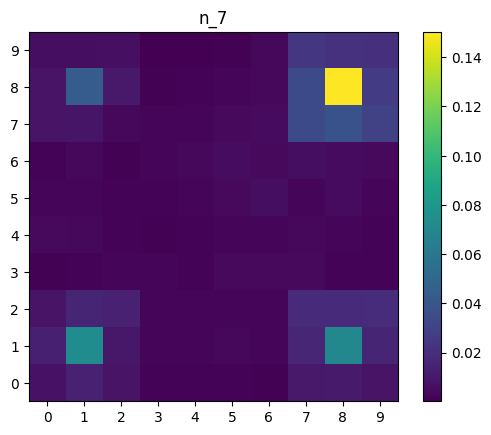

<Figure size 640x480 with 0 Axes>

In [15]:
dir = "data/2DComparison/iterations_"+str(iterations_number)+"_batch_size_"+str(batch_size)+"_burnin_"+str(burn_factor)+"_sigma_"+str(deviation)+"/grid_length"+str(grid_length)+"/draws/"

fileNumber = 0

for file in Path(dir).glob("**/*draw*"):
    fileNumber += 1



axis = np.arange(grid_length)

for file in Path(dir).glob("**/*draw*"):
    df = np.genfromtxt(file, delimiter=',', skip_header=1)
    df = np.array(df)
    data = np.zeros(shape=(grid_length, grid_length))
    batchNumber = float(np.sum(df[:,2]))

    for i in range(df.shape[0]):
        data[int(df[i, 0]), int(df[i, 1])] += df[i, 2]/batchNumber
    plt.xticks(axis, labels=axis.astype(str))
    plt.yticks(axis, labels=axis.astype(str))
    title = str(os.path.basename(file).split("batch_",1)[1]) # Remove part beofre batch number
    title = title.split(".csv")[0] # Remove the ending
    plt.imshow(data, cmap='viridis')
    plt.colorbar()
    plt.gca().set_title(str(title))
    plt.gca().invert_yaxis()
    plt.show()
    plt.clf()
    
    



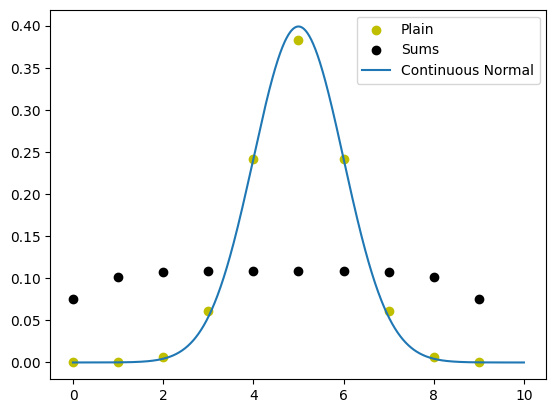

<Figure size 640x480 with 0 Axes>

In [50]:
n = 10

fig, ax = plt.subplots()

prob = MCMC.discreteNormalDistribution(n, mean=n/2.0, deviation=1.0)
probSums = MCMC.discreteNormalDistributionSums(n, mean=0.0, deviation=1.0)
x = range(n)
xContinuous = np.linspace(0, grid_length, 1000)

ax.scatter(x, prob, color='y', label="Plain")
ax.scatter(x, probSums, color='k', label="Sums")
ax.plot(xContinuous, scipy.stats.norm.pdf(xContinuous, loc=n/2.0, scale=1.0), label="Continuous Normal")
ax.legend()

plt.savefig("Comparison_Proposed_Distribution.png")

plt.show()
plt.clf()

In [88]:
np.random.choice(np.arange(n), size=10, p=MCMC.discreteNormalDistribution(grid_length=n))
np.random.choice(np.arange(n), size=10, p=MCMC.discreteNormalDistributionSums(grid_length=n))

array([1, 3, 4, 2, 0, 9, 3, 4, 7, 2])